In [1]:
exec(open("init_notebook.py").read())


current working dirF:\myProjects\av\junction-art


In [2]:
import numpy as np
import os
import pyodrx 
import math
import dill
from junctions.RoadBuilder import RoadBuilder
from junctions.StandardCurvatures import StandardCurvature
from junctions.StandardCurveTypes import StandardCurveTypes
from junctions.JunctionMerger import JunctionMerger
import extensions, junctions
from copy import copy

In [3]:
roadBuilder = junctions.RoadBuilder()

junction = pyodrx.Junction('test',1)

#1. create two arbitrary roads
roads = []
roads.append(pyodrx.create_straight_road(0))
roads.append(roadBuilder.createCurve(1, np.pi/3, True, curvature = 0.5))
roads.append(pyodrx.create_straight_road(2))

roads[0].add_successor(pyodrx.ElementType.junction,1)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.junction,1)

con1 = pyodrx.Connection(0,1,pyodrx.ContactPoint.start)
con1.add_lanelink(-1,-1)
junction.add_connection(con1)

# ---------------

newConnectionId = 3
newRoadId = newConnectionId + 1

roads.append(roadBuilder.createCurve(newConnectionId, np.pi/5, True, curvature = 0.5))
roads.append(pyodrx.create_straight_road(newRoadId))

roads[newConnectionId].add_predecessor(pyodrx.ElementType.road,newConnectionId-1,pyodrx.ContactPoint.start)
roads[newConnectionId].add_successor(pyodrx.ElementType.road, newRoadId, pyodrx.ContactPoint.start)
roads[newRoadId].add_predecessor(pyodrx.ElementType.junction, newConnectionId)

con1 = pyodrx.Connection(newConnectionId-1, newConnectionId ,pyodrx.ContactPoint.start)
con1.add_lanelink(-1,-1)
junction.add_connection(con1)

# --------------- copy this to insert as many as you want

# newConnectionId = newConnectionId + 2
# newRoadId = newConnectionId + 1

# roads.append(roadBuilder.createCurve(newConnectionId, np.pi/5, True, curvature = 0.2))
# roads.append(pyodrx.create_straight_road(newRoadId))

# roads[newConnectionId].add_predecessor(pyodrx.ElementType.road,newConnectionId-1,pyodrx.ContactPoint.start)
# roads[newConnectionId].add_successor(pyodrx.ElementType.road, newRoadId, pyodrx.ContactPoint.start)
# roads[newRoadId].add_predecessor(pyodrx.ElementType.junction, newConnectionId)

# con1 = pyodrx.Connection(newConnectionId-1, newConnectionId ,pyodrx.ContactPoint.start)
# con1.add_lanelink(-1,-1)
# junction.add_connection(con1)

# --------------- copy this to insert as many as you want

# newConnectionId = newConnectionId + 2
# newRoadId = newConnectionId + 1

# roads.append(roadBuilder.createCurve(newConnectionId, np.pi/5, True, curvature = 0.3))
# roads.append(pyodrx.create_straight_road(newRoadId))

# roads[newConnectionId].add_predecessor(pyodrx.ElementType.road,newConnectionId-1,pyodrx.ContactPoint.start)
# roads[newConnectionId].add_successor(pyodrx.ElementType.road, newRoadId, pyodrx.ContactPoint.start)
# roads[newRoadId].add_predecessor(pyodrx.ElementType.junction, newConnectionId)

# con1 = pyodrx.Connection(newConnectionId-1, newConnectionId ,pyodrx.ContactPoint.start)
# con1.add_lanelink(-1,-1)
# junction.add_connection(con1)


# ---------------

# now need to create connection roads for non-adjacent roads.
# connect 0 with 4, 6

newConnectionId = newConnectionId + 2
newRoadId = newConnectionId + 1

roads.append(roadBuilder.createCurve(newConnectionId, np.pi/200, True, curvature = 0.1, curveType=StandardCurveTypes.LongArc))
roads.append(pyodrx.create_straight_road(newRoadId))

roads[newConnectionId].add_predecessor(pyodrx.ElementType.road,newConnectionId-1,pyodrx.ContactPoint.start)
roads[newConnectionId].add_successor(pyodrx.ElementType.road, newRoadId, pyodrx.ContactPoint.start)



# newConnectionId = newConnectionId + 2
# roads.append(roadBuilder.createCurveByLength(newConnectionId, 20, True, curvature = -0.001))

# roads[newConnectionId].add_predecessor(pyodrx.ElementType.road,newConnectionId-1,pyodrx.ContactPoint.start)
# roads[newConnectionId].add_successor(pyodrx.ElementType.road, 0, pyodrx.ContactPoint.end)

# con1 = pyodrx.Connection(newConnectionId-1, newConnectionId ,pyodrx.ContactPoint.start)
# con1.add_lanelink(-1,-1)
# junction.add_connection(con1)


# 3. create junction

In [4]:

odr = pyodrx.OpenDrive('myroad')
for r in roads:
    odr.add_road(r)
    
# odr.create_junction()

odr.add_junction(junction)
odr.adjust_roads_and_lanes()



start points starting
start points adjusted
analizing roads 0 1
create_lane_links for roads 0 and 1 
analizing roads 0 2
create_lane_links for roads 0 and 2 
analizing roads 0 3
create_lane_links for roads 0 and 3 
analizing roads 0 4
create_lane_links for roads 0 and 4 
analizing roads 0 5
create_lane_links for roads 0 and 5 
analizing roads 0 6
create_lane_links for roads 0 and 6 
analizing roads 1 2
create_lane_links for roads 1 and 2 
analizing roads 1 3
create_lane_links for roads 1 and 3 
analizing roads 1 4
create_lane_links for roads 1 and 4 
analizing roads 1 5
create_lane_links for roads 1 and 5 
analizing roads 1 6
create_lane_links for roads 1 and 6 
analizing roads 2 3
create_lane_links for roads 2 and 3 
analizing roads 2 4
create_lane_links for roads 2 and 4 
analizing roads 2 5
create_lane_links for roads 2 and 5 
analizing roads 2 6
create_lane_links for roads 2 and 6 
analizing roads 3 4
create_lane_links for roads 3 and 4 
analizing roads 3 5
create_lane_links for ro

plotting xord: F:\myProjects\av\esmini\resources\xodr\pythonroad.xodr
opening matplot lib


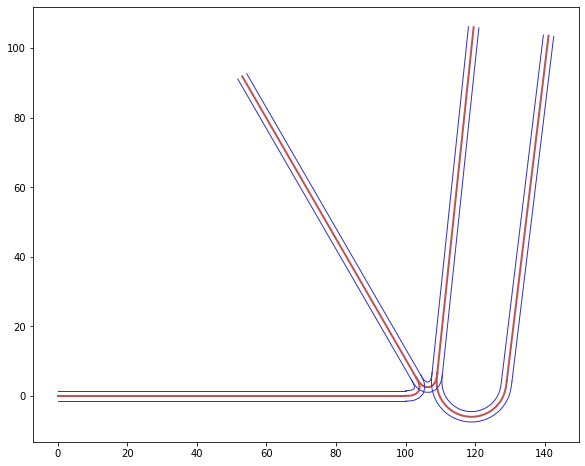

In [5]:

extensions.view_road(odr,os.path.join('..','F:\\myProjects\\av\\esmini'))

In [6]:

# pyodrx.prettyprint(odr.get_element())

In [7]:
roads[0].getAdjustedStartPosition()

(0, 0, 0)

In [8]:
roads[0].getAdjustedEndPosition()

(100.0, 0.0, 0)

In [9]:
startX, startY, startH = 0.0, 0.0, 0.0
for road in roads:
#     endX, endY, endH = road.getEndPosition(startX, startY, startH)
    print(f"roadId: {road.id}, \n  start_adj: {road.getAdjustedStartPosition()}\tend_adj: {road.getAdjustedEndPosition()}")
#     print(f"\n  start_raw: {startX, startY, startH}\tend_raw: {endX, endY, endH}")
#     if road.id % 2 != 0: # connecting roads start at the start
#         startX, startY, startH = endX, endY, endH

roadId: 0, 
  start_adj: (0, 0, 0)	end_adj: (100.0, 0.0, 0)
roadId: 1, 
  start_adj: (103.75217795668424, 1.3515532960075562, 1.0471978674502582)	end_adj: (103.04656690349583, 5.276810605250397, 2.094395420741251)
roadId: 2, 
  start_adj: (103.04656690349583, 5.276810605250397, 2.094395420741251)	end_adj: (53.046539333748015, 91.8793350662871, 2.094395420741251)
roadId: 3, 
  start_adj: (106.81875196353447, 2.502463280125178, 6.492625452439501)	end_adj: (109.13638126891142, 6.571243650044372, 7.749262516388693)
roadId: 4, 
  start_adj: (109.13638126891142, 6.571243650044372, 7.749262516388693)	end_adj: (119.58916419153545, 106.02343985089504, 7.749262516388693)
roadId: 5, 
  start_adj: (128.57838121511898, 1.2365660592753378, 13.86044562734718)	end_adj: (129.11438806303096, 4.312708890593447, 14.016739863426215)
roadId: 6, 
  start_adj: (129.11438806303096, 4.312708890593447, 14.016739863426215)	end_adj: (141.1280083445257, 103.58845078020138, 14.016739863426215)


In [10]:
roads[0].getAdjustedStartPosition()

(0, 0, 0)

In [11]:
roads[0].getAdjustedEndPosition()

(100.0, 0.0, 0)

In [12]:
roads[-1].getAdjustedStartPosition()

(129.11438806303096, 4.312708890593447, 14.016739863426215)

In [13]:
roads[-1].getAdjustedEndPosition()

(141.1280083445257, 103.58845078020138, 14.016739863426215)

In [14]:

for road in roads:
    _, _, heading = road.getAdjustedEndPosition()
    print(f"roadId: {road.id}, \n  heading_adj: {math.degrees(heading) % 360}")

roadId: 0, 
  heading_adj: 0.0
roadId: 1, 
  heading_adj: 120.00001824000002
roadId: 2, 
  heading_adj: 120.00001824000002
roadId: 3, 
  heading_adj: 84.00003652800001
roadId: 4, 
  heading_adj: 84.00003652800001
roadId: 5, 
  heading_adj: 83.10003670710012
roadId: 6, 
  heading_adj: 83.10003670710012


In [16]:
math.degrees(roads[0].getClockWiseAngleWith(roads[-1], pyodrx.ContactPoint.end, pyodrx.ContactPoint.start))

heading1 0 heading2 14.016739863426215


83.10003670710006